In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
from os.path import getsize
from IPython.display import Audio
from random import choice

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/voice_data.csv")

smallest_file = min(df["filepath"], key=getsize)
y, sr = librosa.load(smallest_file)
y, _ = librosa.effects.trim(y)
duration = librosa.get_duration(y=y, sr=sr)
display(duration)

filepath = choice(df["filepath"])

3.960090702947846

In [3]:
y, sr = librosa.load(filepath)
y, _ = librosa.effects.trim(y)

# Cut audio to a common denominator
y = y[:int(sr*duration)]
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 171)

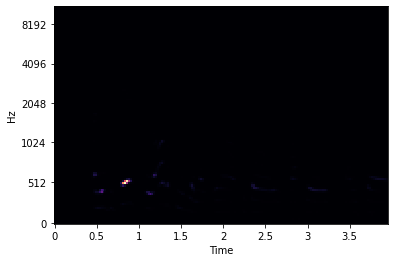

In [4]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [5]:
Audio(data=y, rate=sr)